In [64]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

permittivity_real = 0.0125
permittivity_imaginary = 0.0125
data = {
    'Frequency': np.linspace(1.0, 2.0, 5),
    'Real': np.random.uniform(0.01, 0.5, 5),
    'Imaginary': np.random.uniform(0.01, 0.5, 5)
}
df = pd.DataFrame(data)
print(f"Output: {permittivity_real}")
print(f"Output: {permittivity_imaginary}")
print(f"Dataframe: ")
print(df)

Output: 0.0125
Output: 0.0125
Dataframe: 
   Frequency      Real  Imaginary
0       1.00  0.239002   0.051530
1       1.25  0.412510   0.285216
2       1.50  0.444681   0.078268
3       1.75  0.260903   0.312654
4       2.00  0.144796   0.287215


In [65]:
X = df.values
y = np.array([[permittivity_real, permittivity_imaginary]] * len(df))

In [66]:
X.shape

(5, 3)

In [67]:
y.shape

(5, 2)

In [68]:
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(y.shape[1])
])
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.MeanSquaredError())

In [69]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                64        
                                                                 
 dense_25 (Dense)            (None, 16)                272       
                                                                 
 dense_26 (Dense)            (None, 2)                 34        
                                                                 
Total params: 370 (1.45 KB)
Trainable params: 370 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.MeanSquaredError(),metrics=['accuracy'])
model.fit(X, y, epochs=10, batch_size=1)

Epoch 1/10
5/5 [==============================] - 0s 694us/step - loss: 0.1553 - accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 0s 653us/step - loss: 0.1051 - accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 0s 576us/step - loss: 0.0694 - accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 584us/step - loss: 0.0426 - accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 551us/step - loss: 0.0225 - accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 613us/step - loss: 0.0122 - accuracy: 0.8000
Epoch 7/10
5/5 [==============================] - 0s 647us/step - loss: 0.0059 - accuracy: 0.6000
Epoch 8/10
5/5 [==============================] - 0s 539us/step - loss: 0.0031 - accuracy: 0.4000
Epoch 9/10
5/5 [==============================] - 0s 496us/step - loss: 0.0026 - accuracy: 0.2000
Epoch 10/10
5/5 [==============================] - 0s 480us/step - loss: 0.0021 - accuracy: 0.2000


Epoch 1/10
5/5 [==============================] - 0s 727us/step - loss: 0.0019 - accuracy: 0.2000
Epoch 2/10
5/5 [==============================] - 0s 776us/step - loss: 0.0019 - accuracy: 0.2000
Epoch 3/10
5/5 [==============================] - 0s 839us/step - loss: 0.0019 - accuracy: 0.4000  
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.6000
Epoch 5/10
5/5 [==============================] - 0s 707us/step - loss: 0.0016 - accuracy: 0.6000
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.6000
Epoch 7/10
5/5 [==============================] - 0s 760us/step - loss: 0.0013 - accuracy: 0.6000  
Epoch 8/10
5/5 [==============================] - 0s 641us/step - loss: 0.0012 - accuracy: 0.6000
Epoch 9/10
5/5 [==============================] - 0s 590us/step - loss: 0.0012 - accuracy: 0.6000
Epoch 10/10
5/5 [==============================] - 0s 587us/step - loss: 0.0011 - accuracy: 0.6000


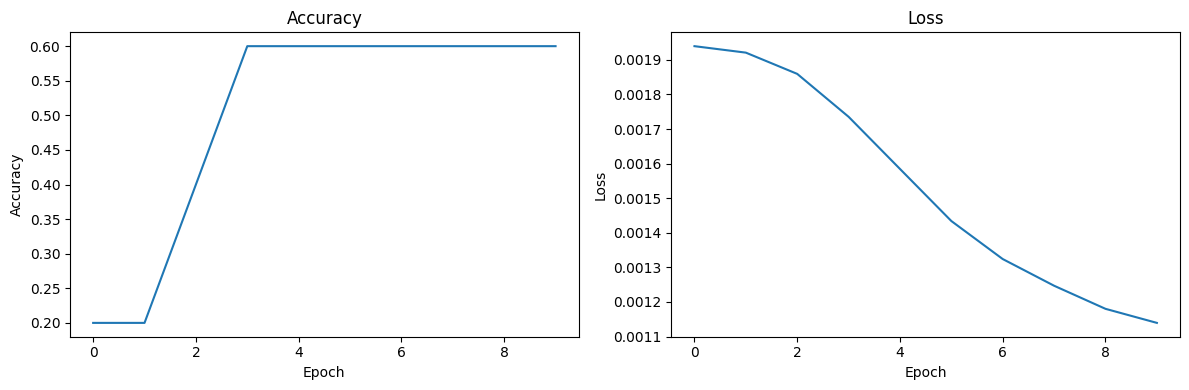

In [71]:
history = model.fit(X, y, epochs=10, batch_size=1)

# Plot the accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()